## PROBLEM STATEMENT 
To build a model to accurately classify a piece of news as REAL or FAKE.

In [1]:
#Data manipulation
import numpy as np
import pandas as pd

#Plotting
import seaborn as sn
import matplotlib.pyplot as plt

#Splitting data to test and train
from sklearn.model_selection import train_test_split 

#Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Model training
from sklearn.linear_model import PassiveAggressiveClassifier

#Model accuracy evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Reading data
df = pd.read_csv('news.csv')

#Getting data shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#Split data into test and train
x_train, x_test, y_train, y_test = train_test_split(df['text'],df['label'],test_size=0.3)

In [4]:
#Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

#Fit and transfrom the train set
tfidf_train=vectorizer.fit_transform(x_train)

#Transform the test set
tfidf_test=vectorizer.transform(x_test)

In [5]:
#Initialize PassiveAggressiveClassifier
clf=PassiveAggressiveClassifier(max_iter=50)

#Fit the vectorized train set
clf.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [6]:
#Predict on vectorized test set
pred = clf.predict(tfidf_test)

#Calculate accuracy score and print it
score = accuracy_score(y_test,pred)
print('Accuracy Score : {}%'.format(round(score*100,2)))

Accuracy Score : 93.79%


Text(0.5, 15.0, 'Predicted Label')

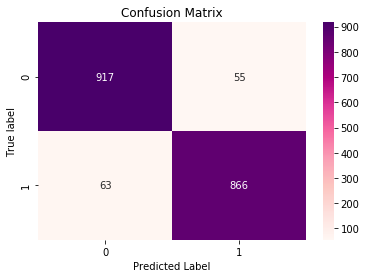

In [7]:
#Build Confusion matrix
cf_matrix = confusion_matrix(y_test,pred, labels=['FAKE','REAL'])

#Visualize Confusion matrix using heatmap
heat_map=sn.heatmap(cf_matrix,annot=True,fmt='',cmap='RdPu')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted Label')